# 模型不正确的设定
By Evgenia "Jenny" Nitishinskaya and Delaney Mackenzie

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)


---

模型规范是指对数据拟合的一般函数的选择。我们需要选择:
* 因变量
* 自变量
* 函数形式

例如，我们可以假设因变量是两个自变量的线性函数。如果没有正确地指定模型，就会违反回归假设，模型就不准确。下面我们定义并解释了许多常见的模型规格说明错误。

# 遗漏重要变量

如果我们忽略一个与我们所包含的变量不相关的变量，我们就不能很好地解释因变量。但是，如果遗漏的变量(例如$X_2$)与包含的变量($X_1$)相关，则遗漏会进一步影响模型。$X_1$的系数和回归中的常数项将因试图补偿$X_2$的遗漏而有偏差。这可能导致我们高估了$X_1$对因变量的影响。而且，系数的估计值和估计的标准误差是不一致的。

特别是，我们可能会被误导，认为两个变量之间有因果关系，因为它们的相关性很高，而实际上它们都是由第三个变量引起的。例如，如果两只股票都跟随市场，或者两只股票的数量都随时间增加，它们就会高度相关。 

In [3]:
# Import the libraries we'll be using
import numpy as np
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt
from pandas_datareader import data

In [3]:

# Pull the pricing data for our two stocks and S&P 500
start = '2013-01-01'
end = '2015-01-01'
bench = data.get_data_yahoo('SPY', start, end)['Close']
a1 = data.get_data_yahoo('LRCX', start, end)['Close']
a2 = data.get_data_yahoo('AAPL', start, end)['Close']

# Perform linear regression and print R-squared values
slr12 = regression.linear_model.OLS(a2, sm.add_constant(a1)).fit()
slrb1 = regression.linear_model.OLS(a1, sm.add_constant(bench)).fit()
slrb2 = regression.linear_model.OLS(a2, sm.add_constant(bench)).fit()
print("R-squared values of linear regression") 
print("LRCX and AAPL: ", slr12.rsquared) 
print("LRCX and SPY: ", slrb1.rsquared) 
print("AAPL and SPY: ", slrb2.rsquared) 

R-squared values of linear regression
LRCX and AAPL:  0.907924614385717
LRCX and SPY:  0.8750415094517181
AAPL and SPY:  0.7904911561097134


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


很难看到一致性，或者缺乏一致性，因为它是渐进的和概率的。然而，我们可以延长我们的样本周期，看看r平方值是如何变化的。股票和市场之间的相关性似乎持续存在，而这两种股票之间的相关性下降。因此，我们最好根据市场价格来预测股票价格，而不是互相预测。

In [5]:
# Pull pricing data from further back
start = '2009-01-01'
end = '2015-01-01'
bench = data.get_data_yahoo('SPY', start, end)['Close']
a1 = data.get_data_yahoo('LRCX', start, end)['Close']
a2 = data.get_data_yahoo('AAPL', start, end)['Close']

# Perform linear regression and print R-squared values
slr12 = regression.linear_model.OLS(a2, sm.add_constant(a1)).fit()
slrb1 = regression.linear_model.OLS(a1, sm.add_constant(bench)).fit()
slrb2 = regression.linear_model.OLS(a2, sm.add_constant(bench)).fit()
print("R-squared values of linear regression") 
print("LRCX and AAPL: ", slr12.rsquared) 
print("LRCX and SPY: ", slrb1.rsquared) 
print("AAPL and SPY: ", slrb2.rsquared)

R-squared values of linear regression
LRCX and AAPL:  0.5006764523883678
LRCX and SPY:  0.7476461102898267
AAPL and SPY:  0.7566824266738167


避免这个问题的最好方法是在开始回归分析之前，选择那些你有理由相信能够很好地预测因变量的自变量。“之前”是关键:不要仅仅根据回归分析的好坏来选择变量，这很重要，因为这会导致过度拟合。

# 包含不必要的变量

相反，我们可以有一个包含太多独立变量的模型。如果我们包含一个真正不必要的变量，我们将得到一个较低的调整的r平方和对其他回归系数的较不精确的估计。也就是说，我们对模型的分析会减弱，但模型本身不会改变。

但是，如果我们包含的变量大部分都是不相关的，那么我们可以人为地改进模型的拟合性和r平方，方法是添加一些稍微相关的变量来符合样本数据。这有过度拟合的风险，因为我们所做的小调整是特定于样本的。例如，下面我们以PEP价格为自变量，PG价格为因变量进行回归(这在某种程度上是有意义的，因为他们在同一部门)，然后再进行一次回归，随机加入其他三支股票。

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


SLR R-squared: 0.7138102062976608
MLR R-squared: 0.837784501108502


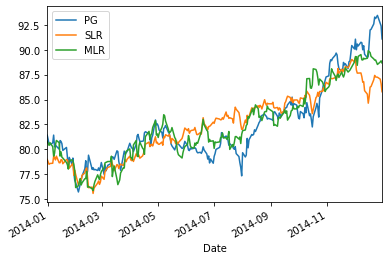

In [4]:
# Load one year's worth of pricing data for five different assets
start = '2014-01-01'
end = '2015-01-01'
x1 = data.get_data_yahoo('PEP', start, end)['Close']
x2 = data.get_data_yahoo('MCD', start, end)['Close']
x3 = data.get_data_yahoo('GOOGL', start, end)['Close']
x4 = data.get_data_yahoo('CMT', start, end)['Close']
y = data.get_data_yahoo('PG', start, end)['Close']

# Build a linear model using only x1 to explain y
slr = regression.linear_model.OLS(y, sm.add_constant(x1)).fit()
slr_prediction = slr.params[0] + slr.params[1]*x1

# Run multiple linear regression using x1, x2, x3, x4 to explain y
mlr = regression.linear_model.OLS(y, sm.add_constant(np.column_stack((x1,x2,x3,x4)))).fit()
mlr_prediction = mlr.params[0] + mlr.params[1]*x1 + mlr.params[2]*x2 + mlr.params[3]*x3 + mlr.params[4]*x4

# Compute adjusted R-squared for the two different models
print('SLR R-squared:', slr.rsquared_adj) 
print('MLR R-squared:', mlr.rsquared_adj) 

# Plot y along with the two different predictions
y.plot()
slr_prediction.plot()
mlr_prediction.plot()
plt.legend(['PG', 'SLR', 'MLR']);

我们能够使用更多的变量更精确地调整模型以适应数据。请注意，尽管调整r平方会因为使用更多的变量而惩罚我们，但是这里的样本数量如此之大，所以调整非常小。让我们看看如果我们使用相同的线性模型来预测未来6个月PG的价格会发生什么:

SLR R-squared: -0.6904383914942456
MLR R-squared: -9.542221009853026


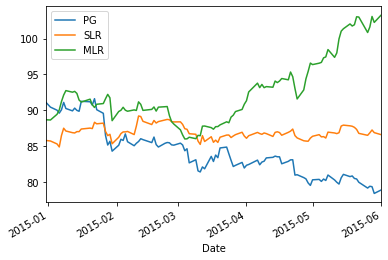

In [5]:
# Load a year and a half of pricing data
start = '2015-01-01'
end = '2015-06-01'
x1 = data.get_data_yahoo('PEP', start, end)['Close']
x2 = data.get_data_yahoo('MCD', start, end)['Close']
x3 = data.get_data_yahoo('GOOGL', start, end)['Close']
x4 = data.get_data_yahoo('CMT', start, end)['Close']
y = data.get_data_yahoo('PG', start, end)['Close']

# Extend our model from before to the new time period
slr_prediction2 = slr.params[0] + slr.params[1]*x1
mlr_prediction2 = mlr.params[0] + mlr.params[1]*x1 + mlr.params[2]*x2 + mlr.params[3]*x3 + mlr.params[4]*x4

# Compute adjusted R-squared over the extended time period
adj = float(len(y) - 1)/(len(y) - 5) # Compute adjustment factor
SST = sum((y - np.mean(y))**2)
SSRs = sum((slr_prediction2 - y)**2)
print( 'SLR R-squared:', 1 - adj*SSRs/SST)
SSRm = sum((mlr_prediction2 - y)**2)
print( 'MLR R-squared:', 1 - adj*SSRm/SST)

# Plot y along with the two different predictions
y.plot()
slr_prediction2.plot()
mlr_prediction2.plot()
plt.legend(['PG', 'SLR', 'MLR']);

现在这两个模型的表现都很差——也就是说，它们在样本外不成立——但特别是多元线性回归的模型现在比单一线性回归的模型表现更差。尽管这种表现可能有许多原因，但我们不应该感到惊讶，因为我们没有理由相信，比如说，雅典娜健康股票在这种情况下有实际的解释力。

# 自变量误差

如果我们使用索引或日期作为自变量，它们是没有误差的。然而，当我们希望使用股票$X_t$的值作为独立变量时，我们只能度量价格，因为它充满了小的、随机的波动。所以我们实际上观察到的是$Z_t = X_t + u_t$对于某个误差$u_t$。我们的模型是
$$ Y_t = b_0 + b_1 X_t + \epsilon_t $$

也就是说，某个变量与股票的价值是线性相关的。但是因为我们只知道$Z_t$的值，所以我们使用这个模型
$$ Y_t = b_0 + b_1 Z_t + (-b_1u_t + \epsilon_t) $$

如果$u_t$与$X_t$不相关，那么它将与$Z_t$相关，因此误差项$-b_1u_t + \epsilon_t$将与我们的自变量$Z_t$相关。因此，系数将是有偏的和不一致的。特别是，$b_1$将向下倾斜。

# 不正确的函数形式

在选择希望包含的变量之后，需要为函数指定形状。虽然回归要求函数的系数是线性的，但我们可以通过处理变量来实现各种类型的函数。例如，模型$Y_i = b_0 + b_1 X_i^2 + \epsilon_i$给出了$X$和$Y$之间的二次关系，而对数线性模型$\ln Y_i = b_0 + b_1 X_i + \epsilon_i$给出了指数关系。通常，我们根据对关系的期望来选择形式:例如，当我们期望$Y$的<i>增长率</i>与$X$相关时，对数线性模型是好的。

如果选择了错误的形式，那么我们可能无法得到一个良好的适合。事实上，这个模型可能会得出荒谬的结论。例如，如果我们使用线性模型，而对数模型可能更合适，我们可以预测某个类别的公司数量将变为负数，而不是趋近于零。

我们还必须小心，不要选择与数据不匹配的函数形式。任意使用高次多项式会导致过拟合，因为它们有更多的自由度。另一个问题是数据挖掘:如果我们尝试不同的模型，直到找到一个看起来最好的模型，我们就是在以牺牲未来预测能力为代价对样本进行过度拟合。

# 来自不同总体

如果我们试图对两个总体使用一个模型，分别使用不同的模型会更合适，我们得到的结果会在一个或另一个方向上产生误导。例如，如果我们把男性和女性的工资数据混合在一起，可能会有太多的差异，很难找到一个合适的模型，如下面的人为例子所示。

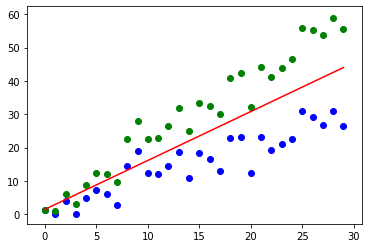

In [9]:
# Generate two artificial samples and pool them
sample1 = np.arange(30) + 4*np.random.randn(30)
sample2 = sample1 + np.arange(30)
pool = np.hstack((sample1, sample2))

# Run a regression on the pooled data, with the independent variable being the original indices
model = regression.linear_model.OLS(pool, sm.add_constant(np.hstack((np.arange(30),np.arange(30))))).fit()

# Plot the two samples along with the regression line
plt.scatter(np.arange(30), sample1, color='b')
plt.scatter(np.arange(30), sample2, color='g')
plt.plot(model.params[0] + model.params[1]*np.arange(30), color='r')

显然，为这两个数据集建立两个单独的模型更合适。请注意，如上所述，这可能导致违反假设，如异方差和非正态分布的误差。

相反地，我们可以将几组单独显示不相关的观测数据汇集在一起，但是当它们放在一起时，看起来确实符合相关模型。要了解为什么这可能是一个问题，请考虑一个比较公司的自由现金流和运营现金流的模型。下面我们看到，对于市值超过1亿美元的运输公司，两者之间存在相关性。然而，如果我们按公司收入来衡量这两个数据集，契合度就不那么重要了。也就是说，自由现金流和运营现金流之间的相关性很大程度上取决于公司规模，因此没有给我们任何信息。

In [10]:
# We'll be using pandas DataFrames
import pandas as pd

# Get most recent free cash flow, operating cash flow, and total revenue data
fundamentals = init_fundamentals()
today = pd.datetime.today()
data = get_fundamentals(query(fundamentals.cash_flow_statement.free_cash_flow,
                              fundamentals.cash_flow_statement.operating_cash_flow,
                              fundamentals.income_statement.total_revenue,)
                        .filter(fundamentals.valuation.market_cap > 1e8, # Filter by market cap & industry
                               fundamentals.company_reference.industry_template_code == 'T'), today).T

# Drop missing data
data.dropna(inplace=True)

# Run linear regression and print R-squared value to evaluate the goodness of the fit 
unscaled_model = regression.linear_model.OLS(data['operating_cash_flow'],
                                    sm.add_constant(data['free_cash_flow'])).fit()
prediction = unscaled_model.params[0] + unscaled_model.params[1]*data['free_cash_flow']
print 'R-squared value of model:', unscaled_model.rsquared

# Plot the raw data for visualization
plt.scatter(data['free_cash_flow'], data['operating_cash_flow'])
plt.plot(data['free_cash_flow'], prediction)
plt.legend(['Data', 'Model Prediction'])
plt.xlabel('Free cash flow')
plt.ylabel('Operating cash flow')
plt.title('Transportation companies with market cap > $100 mil');

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('R-squared value of model:', unscaled_model.rsquared)? (<ipython-input-10-ef5c2de98b88>, line 20)

R-squared value of scaled model: 0.00138262658438


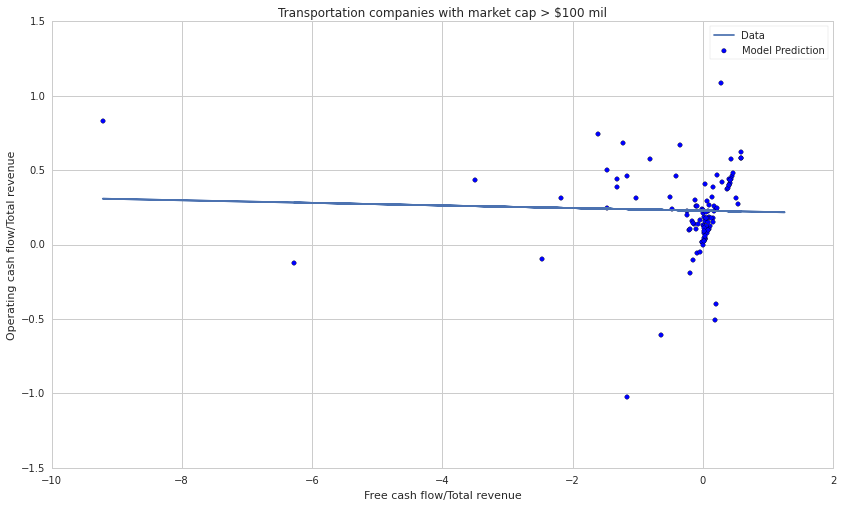

In [8]:
# Run linear regression with inputs scaled by total revenue
scaled_model = regression.linear_model.OLS(
    data['operating_cash_flow'].values/data['total_revenue'].values,
    sm.add_constant(data['free_cash_flow'].values/data['total_revenue'].values), missing='drop').fit()
print 'R-squared value of scaled model:', scaled_model.rsquared

prediction = scaled_model.params[0] + scaled_model.params[1]*(data['free_cash_flow'].values/data['total_revenue'].values)

# Plot the scaled data
plt.scatter(data['free_cash_flow'].values/data['total_revenue'].values,
            data['operating_cash_flow'].values/data['total_revenue'].values)
plt.plot(data['free_cash_flow'].values/data['total_revenue'].values, prediction)
plt.legend(['Data', 'Model Prediction'])
plt.xlabel('Free cash flow/Total revenue')
plt.ylabel('Operating cash flow/Total revenue')
plt.title('Transportation companies with market cap > $100 mil');

一般来说，如果我们希望比较来自不同人群的数据，我们可以分别分析它们，或者尝试调整它们之间的差异。我们通常将变量表示为比率，例如按公司收入或按每个人口的平均工资比例来表示。

# 非平稳的时间序列

平稳过程是联合概率分布不随时间变化的过程。特别是，它的均值和方差是常数。当我们对时间序列应用回归模型时，我们必须附加一个假设，即它们是平稳的。否则，参数的t统计信息将无效。

随机游走是对下一个值的最佳估计是上一个值的过程;如果你随机行走，每一步之后你的位置将会是在你之前的位置附近的某个地方，但是方向是不可预测的。形式上，这样的一维步行可以用这个方程来描述
$$ x_t = x_{t-1} + \epsilon_t $$

其中误差$\epsilon_t$是同方差的，它的均值为零，并且不是自相关的。例如，汇率通常被假定为随机游走。随机游动的方差随时间增加，因此不是平稳的。它们会受到虚假结果的影响，两个随机游动往往会呈现出高度相关。试着运行下面的代码几次:

### 所有的游走

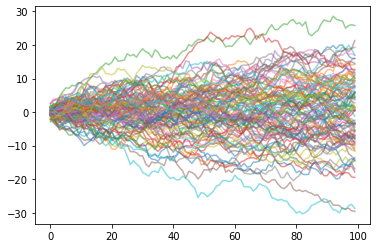

In [11]:
# Generate normally distributed errors
randos = [np.random.randn(100) for i in range(100)]
y = np.random.randn(100)
# Generate random walks
randows = [[sum(rando[:i+1]) for i in range(100)] for rando in randos]
yw = [sum(y[:i+1]) for i in range(100)]

for i in range(100):
    plt.plot(randows[i], alpha=0.5)

### 只是那些和随机选择的相关的

Linearly related walks out of 100: 2


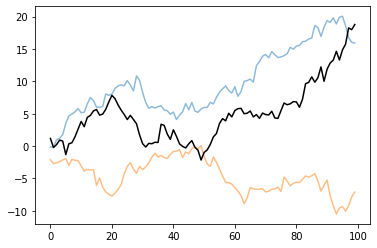

In [12]:
# Compute R-squared of linear regression for each element of randows with yw
rs = [regression.linear_model.OLS(yw, x).fit().rsquared for x in randows]

# Plot and count the random walks that have R-squared with yw > .8
rcount = 0
for i in range(100):
    if rs[i] > .8:
        rcount += 1
        plt.plot(randows[i], alpha=0.5)
print('Linearly related walks out of 100:', rcount) 

# Plot yw
plt.plot(yw, color='k');

以上两个分支的原因是线性拟合对于正相关和负相关的变量都很有效。

根据相关系数的p值，如果我们观察具有显著相关性的随机游动，结果会更加极端:

Significantly correlated walks out of 100: 80


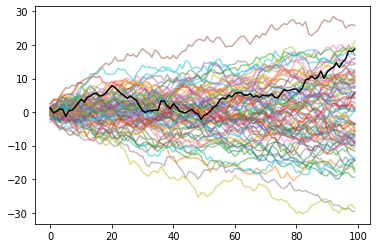

In [13]:
from scipy.stats import pearsonr

# Compute correlation coefficients (Pearson r) and record their p-values
ps = [pearsonr(yw, x)[1] for x in randows]

# Plot and count the random walks that have p-value of correlation with yw < 0.05
pcount = 0
for i in range(100):
    if ps[i] < .05:
        pcount += 1
        plt.plot(randows[i], alpha=0.5)
print('Significantly correlated walks out of 100:', pcount) 

# Plot yw
plt.plot(yw, color='k');

摘要由于随机游动回归时拟合结果的高概率性，使得随机游动回归时所计算的拟合统计量是无效的。此外，参数估计不一致。

我们可以通过检查时间序列中是否存在<i>单位根</i>来检测随机游动和相关的时间序列(例如具有漂移的随机游动);也就是说，不管它是否遵循等式$x_t = x_{t-1} + \epsilon_t$。一种方法是使用Dickey-Fuller测试:

In [14]:
from statsmodels.tsa.stattools import adfuller

# Compute the p-value of the Dickey-Fuller statistic to test the null hypothesis that yw has a unit root
print(adfuller(yw)[1]) 

0.9932293101000508


因此，我们不能拒绝`yw`有一个单位根的假设(正如我们所知道的，通过构造)。如果我们知道一个时间序列有一个单位根，无论如何我们都要对它进行分析，我们可以对第一个差分序列$y_t = x_t - x_{t-1}$进行建模，如果它是平稳的，然后用它来预测$x$的未来值。如果因变量和自变量都是具有单位根的时间序列，并且两者是协整的，我们也可以使用回归。

## 参考
* "Quantitative Investment Analysis", by DeFusco, McLeavey, Pinto, and Runkle